## 1. Описание набора

Этот датасет предназначен для исследования и сравнения различных методов обработки данных и распознавания образов в контексте реальных медицинских проблем. Он ориентирован на решение двух важных задач в области кардиологии: прогнозирование осложнений инфаркта миокарда (MI) на основе сведений о пациенте.

Ссылка на датасет: https://archive.ics.uci.edu/dataset/579/myocardial+infarction+complications

### Основные задачи:
1. Прогнозирование осложнений инфаркта миокарда:
   - Использование исходных данных пациента, собранных на разных этапах госпитализации, для предсказания возможных осложнений. Данные отслеживаются в четыре временных промежутка:
     - На момент поступления в больницу.
     - На конец первого дня больничного периода.
     - На конец второго дня.
     - На конец третьего дня.
   - Для каждого временного момента используются разные поднаборами входных данных.
2. Фенотипирование и визуализация заболевания:
   - Кластерный анализ для выявления типов заболеваний.
   - Динамическое фенотипирование с целью идентификации траекторий заболевания.
   - Визуализация и картографирование заболевания.

### Характеристики датасета
- Входные данные: 111 колонок с различными параметрами пациента, которые могут включать медицинские показатели, биохимические анализы, демографические данные и т. д.
- Колонки с выходными данными: 12, соответствуют возможным осложнениям после инфаркта миокарда.
- Четыре временных момента для прогноза осложнений, отличающихся доступностью данных.

### Применение данных:
Датасет предоставляет исследователям возможность разработки и тестирования алгоритмов для точного прогнозирования медицинских исходов. Он также поддерживает задачи, связанные с аналитическим исследованием процессов течения болезни и адаптацией стратегий лечения.

### Связанное исследование
https://www.semanticscholar.org/paper/Trajectories%2C-bifurcations%2C-and-pseudo-time-in-to-Golovenkin-Bac/0ea5a469d4f0d83ce6a0d2f7215269877afaf628

### Переменные

![image1](https://i.imgur.com/Q6DL94M.png)

### Просмотр набора

In [207]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
myocardial_infarction_complications = fetch_ucirepo(id=579) 
  
# data (as pandas dataframes) 
X = myocardial_infarction_complications.data.features 
y = myocardial_infarction_complications.data.targets 

In [208]:
X.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,...,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [209]:
y.head()

,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0


## 1. Построить модель DecisionTreeClassifier и исследовать влияние гиперпараметров алгоритма

In [210]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import hamming_loss, jaccard_score, f1_score
from sklearn.impute import SimpleImputer

In [211]:
imputer = SimpleImputer(strategy='median') 
X_prep = imputer.fit_transform(X)
X_prep_df = pd.DataFrame(X_prep, columns=X.columns)
y_prep = y['REC_IM']

In [212]:
# Разделим данные на обучающую и тестовую выборки. Используем 80% данных для обучения и 20% для тестирования.
X_train, X_test, y_train, y_test = train_test_split(X_prep_df, y_prep, test_size=0.2, random_state=42)

In [213]:
# Построение полного дерева решений без ограничений
tree_full = DecisionTreeClassifier(random_state=42)
tree_full.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [214]:
tree_let_is = DecisionTreeClassifier(random_state=42)
tree_let_is.fit(X_train, y_train)
y_pred = tree_let_is.predict(X_test)

In [215]:
accuracy_let_is = accuracy_score(y_test_let_is, y_pred)
print(f"Accuracy: {accuracy_let_is}")

Accuracy: 0.8558823529411764


In [216]:
print("Classification Report:\n", classification_report(y_test_let_is, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       312
           1       0.18      0.21      0.20        28

    accuracy                           0.86       340
   macro avg       0.56      0.56      0.56       340
weighted avg       0.87      0.86      0.86       340



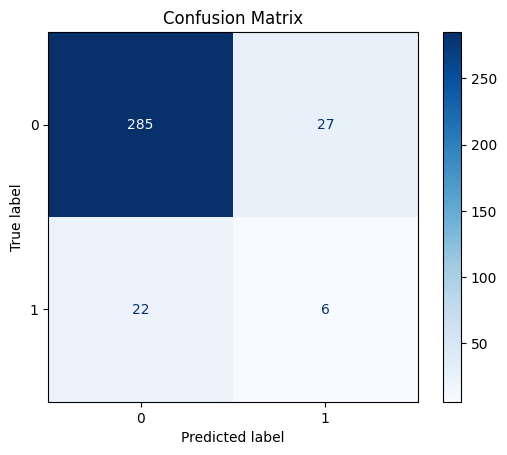

In [217]:
# Визуализация матрицы ошибок
ConfusionMatrixDisplay.from_predictions(y_test_let_is, y_pred, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [250]:
# Исследование гиперпараметров
param_grid = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 2, 5, 10, 20]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'min_samples_leaf': [1, 2, 5, 10, 20]},
             scoring='accuracy')

In [251]:
# Лучшие параметры и точность
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 20}
Best cross-validation accuracy: 0.9014705882352942


In [252]:
# Оценка на тестовой выборке с оптимизированной моделью
best_tree = grid_search.best_estimator_
y_pred_best_let_is = best_tree.predict(X_test)

print(f"Optimized Accuracy: {accuracy_score(y_test_let_is, y_pred_best_let_is)}")
print("Classification Report for optimized:\n", classification_report(y_test_let_is, y_pred_best_let_is))

Optimized Accuracy: 0.9117647058823529
Classification Report for optimized:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       312
           1       0.33      0.07      0.12        28

    accuracy                           0.91       340
   macro avg       0.63      0.53      0.54       340
weighted avg       0.87      0.91      0.88       340



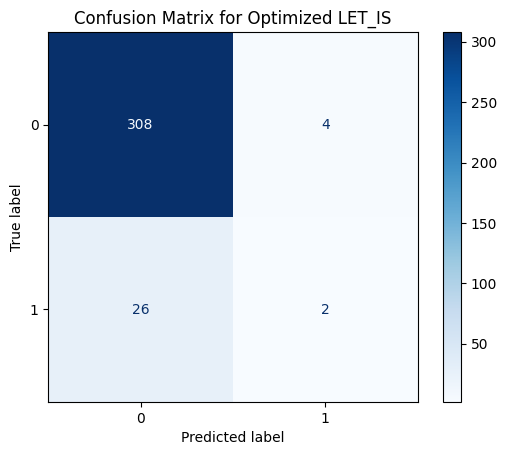

In [253]:
ConfusionMatrixDisplay.from_predictions(y_test_let_is, y_pred_best_let_is, cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Optimized LET_IS")
plt.show()

## 2. Построить структуру дерева решений

### а) Построить структуру дерева решений, указать показатели, участвующие в структуре дерева. 

In [254]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

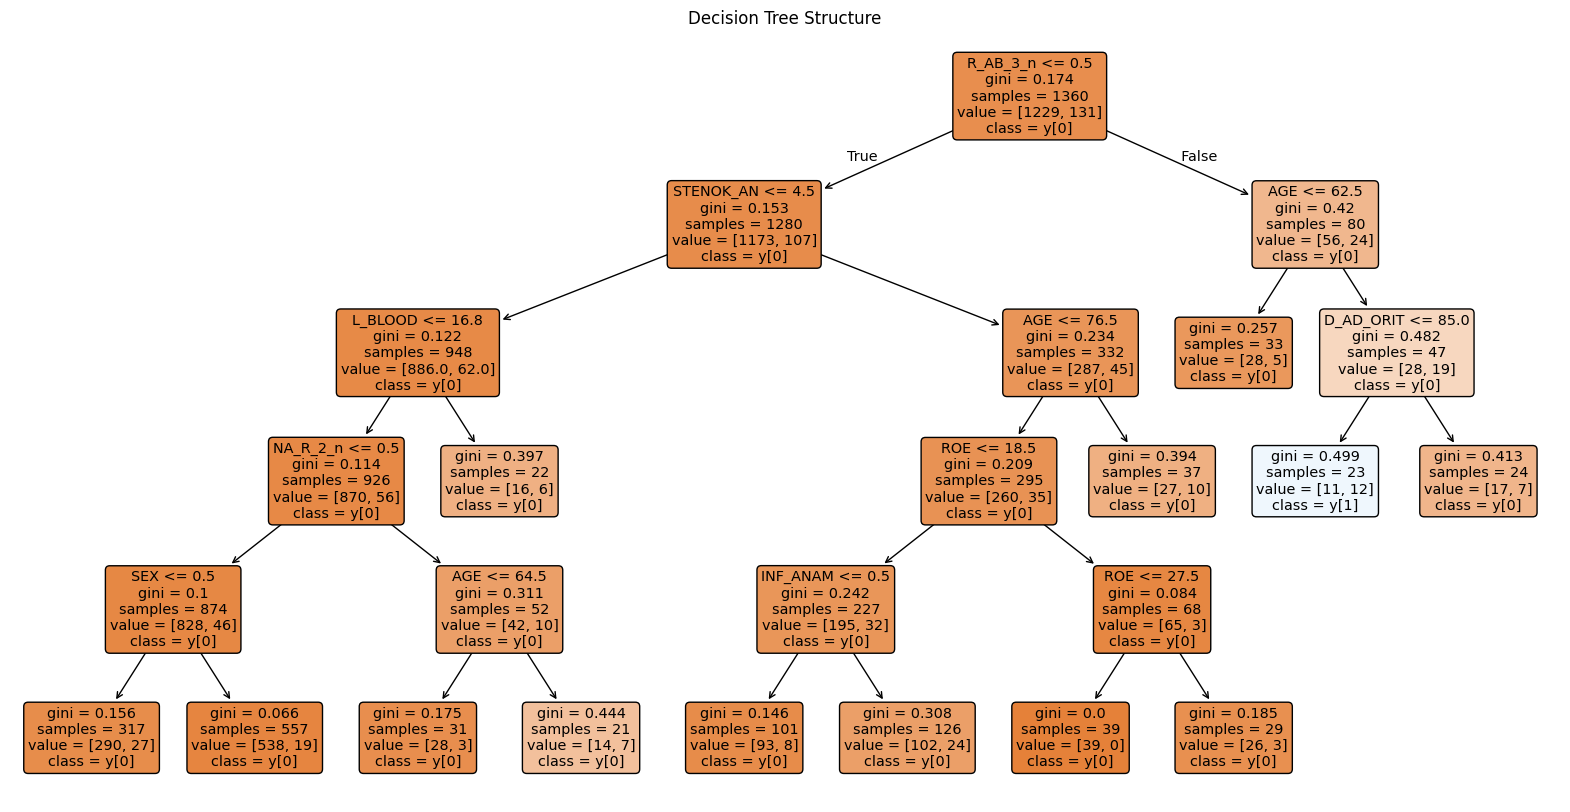

In [255]:
plt.figure(figsize=(20, 10))
plot_tree(best_tree, filled=True, rounded=True, feature_names=X_train.columns, class_names=True)
plt.title("Decision Tree Structure")
plt.show()

#### Показатели, учавствующие в структуре дерева
* **R_AB_3_n** - relapse of the pain in the third day of the hospital period (0: there is no relapse 1: only one 2: 2 times 3: 3 or more times)
* **STENOK_AN** — exertional angina pectoris in the anamnesis — стенокардия (0: never 1: during the last year 2: one year ago 3: two years ago 4: three years ago 5: 4-5 years ago)
* **AGE** — возраст
* **D_AD_ORIT** — diastolic blood pressure according to intensive care unit (диасталическое артериальное давление)
* **L_BLOOD** — white blood cell count (лейкоциты)
* **NA_R_2_N** — use of opioid drugs in the ICU in the second day of the hospital period
* **ROE** — ESR (Erythrocyte sedimentation rate) – скорость оседания эритроцитов
* **INF_ANAM** — quantity of myocardial infarctions in the anamnesis (0: zero 1: one 2: two 3: three and more)
* **SEX** — пол

### б) Для показателя, который является корнем дерева решений, построить диаграмму с группировкой по классу

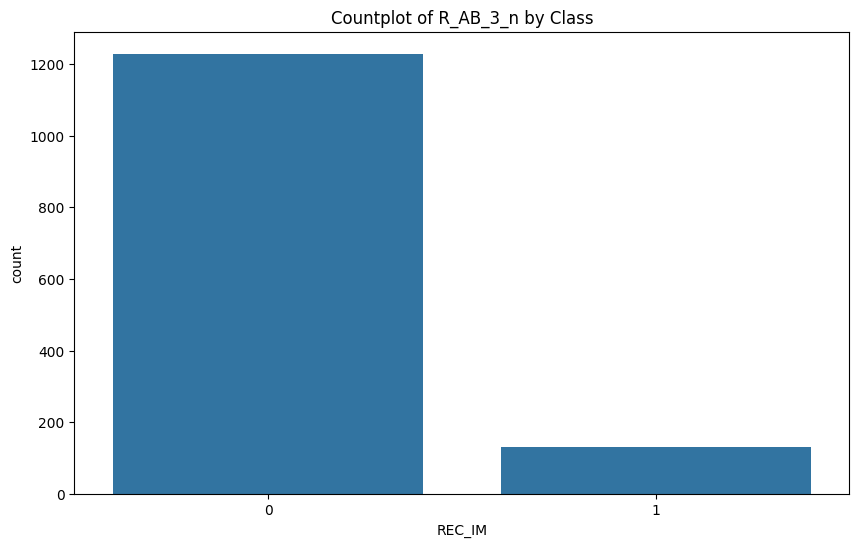

In [256]:
root_feature = X_train.columns[best_tree.tree_.feature[0]]  # получаем имя корневого признака

plt.figure(figsize=(10, 6))
sns.countplot(x=y_train)
plt.title(f"Countplot of {root_feature} by Class")
plt.show()

### в) Провести эксперимент с исключением этого показателя из анализа и построением дерева решений. 

Accuracy without R_AB_3_n: 0.8147058823529412 

Classification Report without R_AB_3_n:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       312
           1       0.07      0.11      0.09        28

    accuracy                           0.81       340
   macro avg       0.49      0.49      0.49       340
weighted avg       0.85      0.81      0.83       340



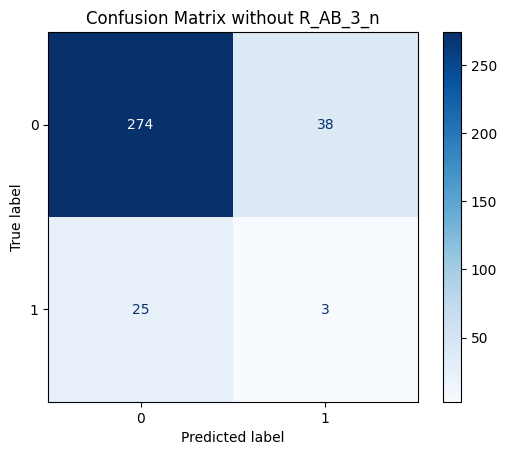

In [257]:
X_train_no_root = X_train.drop(columns=[root_feature])
X_test_no_root = X_test.drop(columns=[root_feature])

tree_no_root = DecisionTreeClassifier(random_state=42)
tree_no_root.fit(X_train_no_root, y_train)

y_pred_no_root = tree_no_root.predict(X_test_no_root)

print(f"Accuracy without {root_feature}: {accuracy_score(y_test_let_is, y_pred_no_root)} \n")
print(f"Classification Report without {root_feature}:\n", classification_report(y_test_let_is, y_pred_no_root))

# Визуализация новой матрицы ошибок
ConfusionMatrixDisplay.from_predictions(y_test_let_is, y_pred_no_root, cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix without {root_feature}")
plt.show()

Показатели упали. Корневой признак содержал множество объектов класса 0, из-за чего модель слишком подстраивалась под тренировочные данные, снижая её способность к обобщению на новых данных. Исключив этот признак, мы уменьшили степень переобучения. 

Также изменение модели привело к тому, что больше образцов класса 0 было неправильно классифицировано.

- Класс 0: Основной увеличившийся показатель — это recall. Это значит, что модель стала более эффективно находить все истинные положительные примеры этого класса, напрямую улучшив F1-score.
  
- Класс 1: Несмотря на улучшение общей точности модели, класс 1 стал классифицироваться хуже. Это скорее всего связано с меньшим количеством обучающих данных для этого класса и тем, что R_AB_3_n действительно имел специфическую важность для правильной классификации этого класса


## 4. Построить модель RandomForest 

In [258]:
from sklearn.ensemble import RandomForestClassifier

In [259]:
param_grid = {
    'n_estimators': [50, 100, 200], # число деревьев
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 10, 20, 30]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=0, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'n_estimators': 50}
Best Accuracy: 0.9036769067693594


Test Accuracy: 0.9176470588235294
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       312
           1       0.00      0.00      0.00        28

    accuracy                           0.92       340
   macro avg       0.46      0.50      0.48       340
weighted avg       0.84      0.92      0.88       340



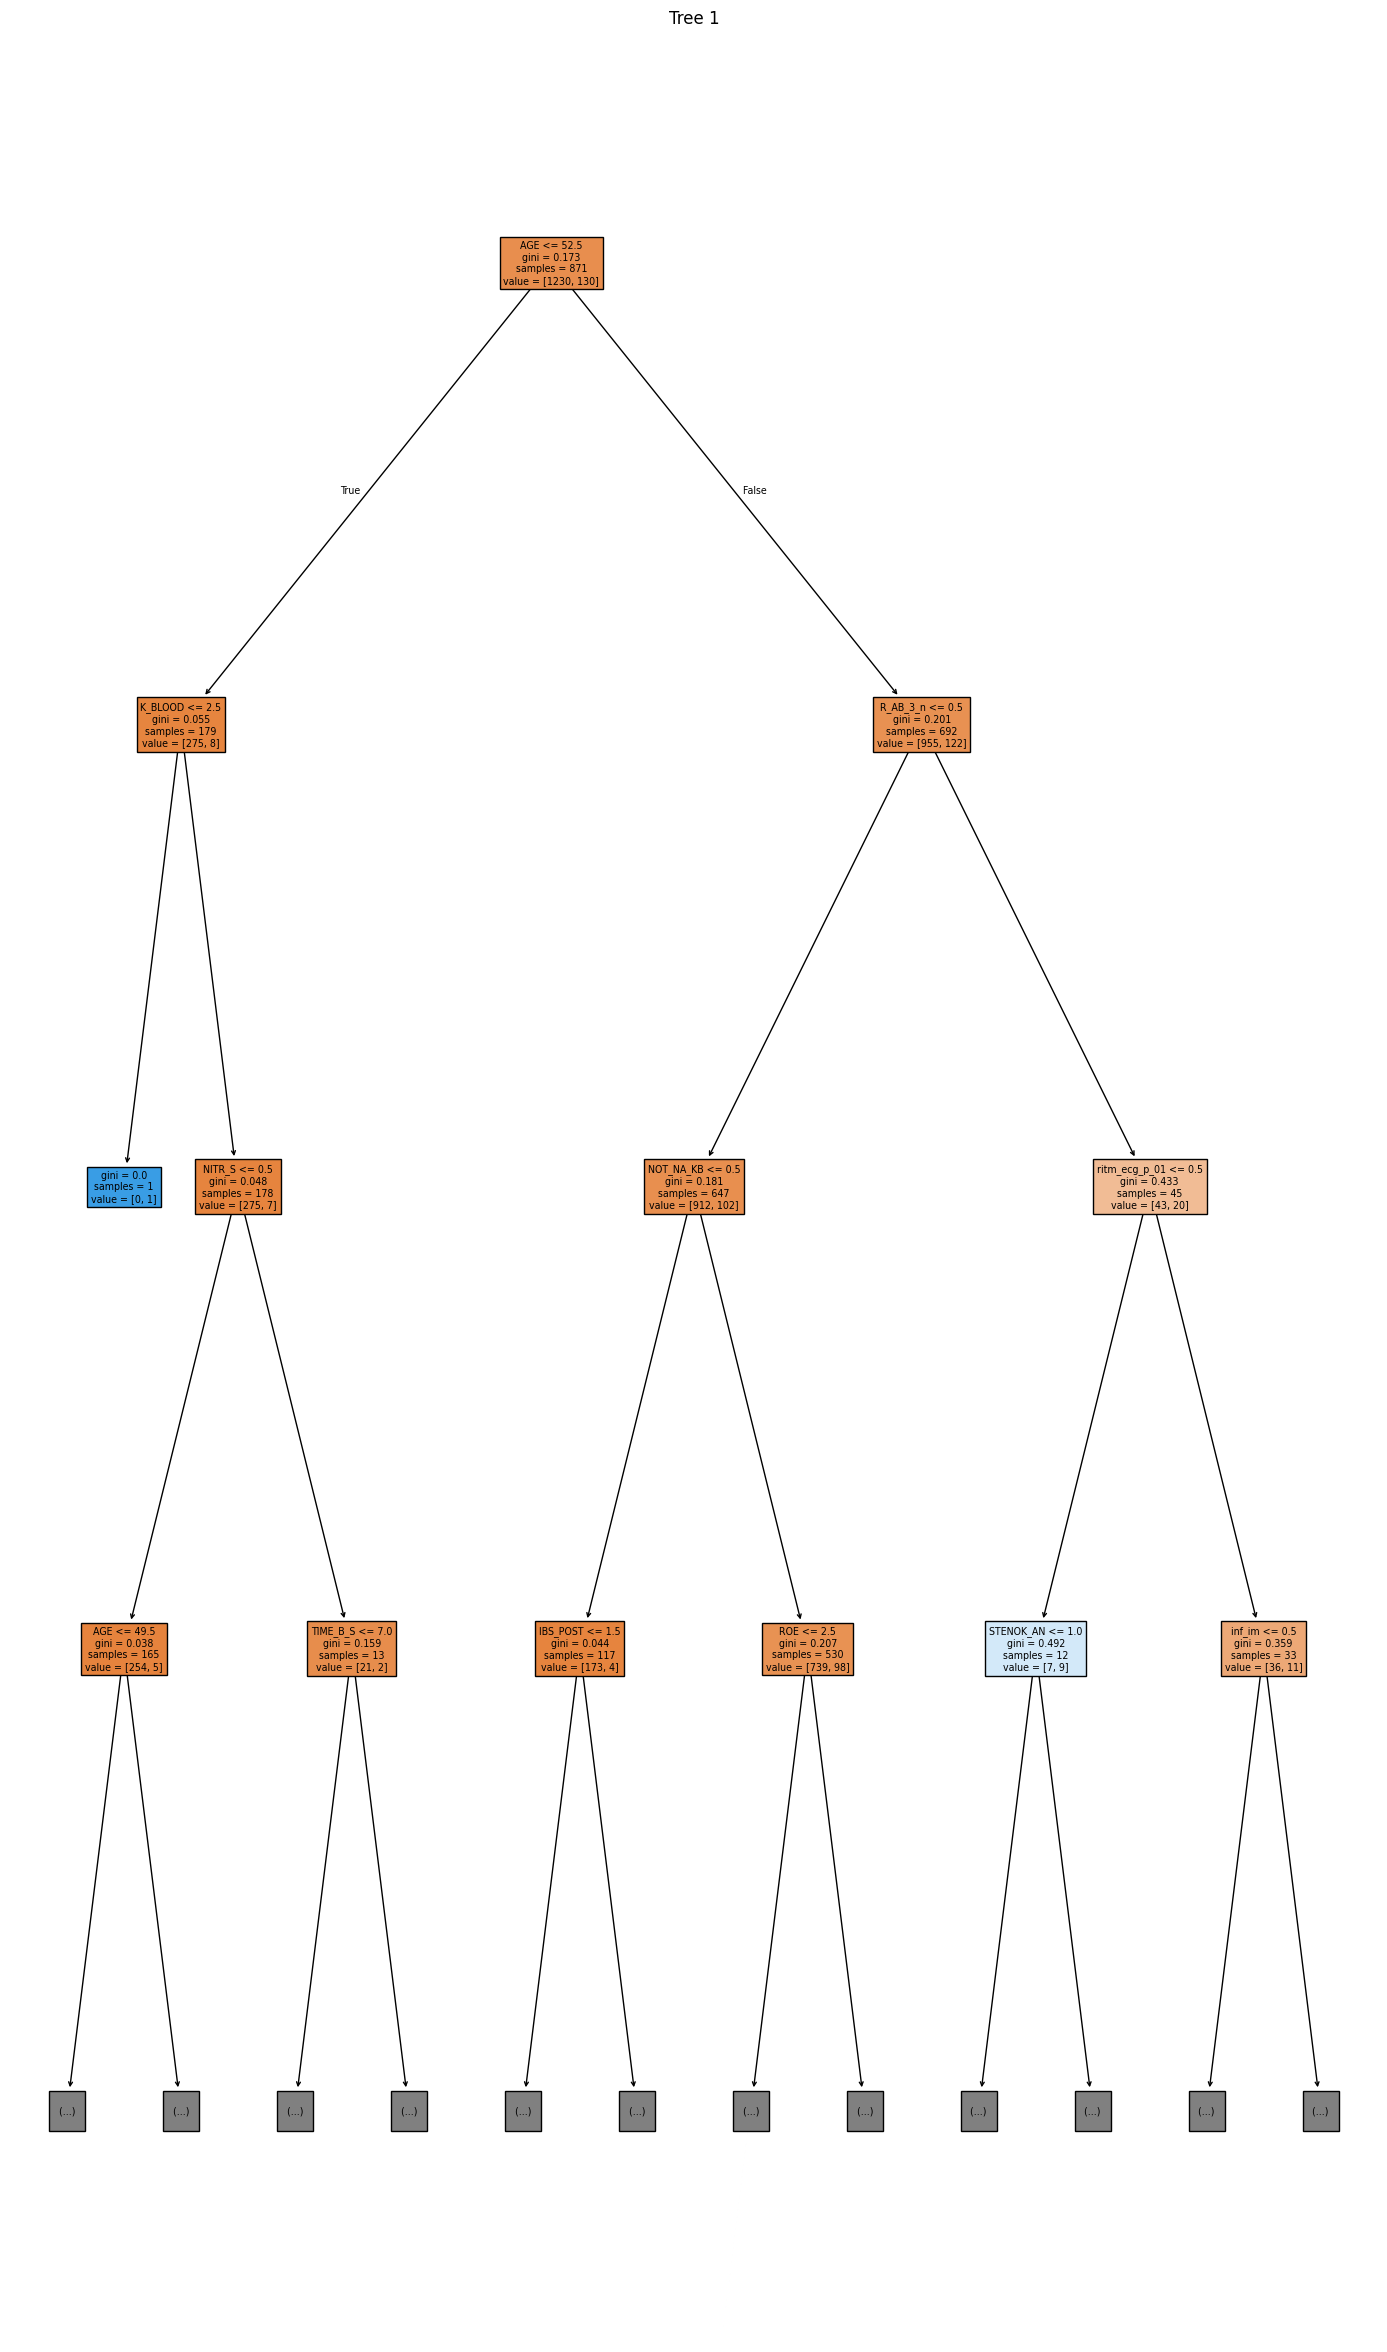

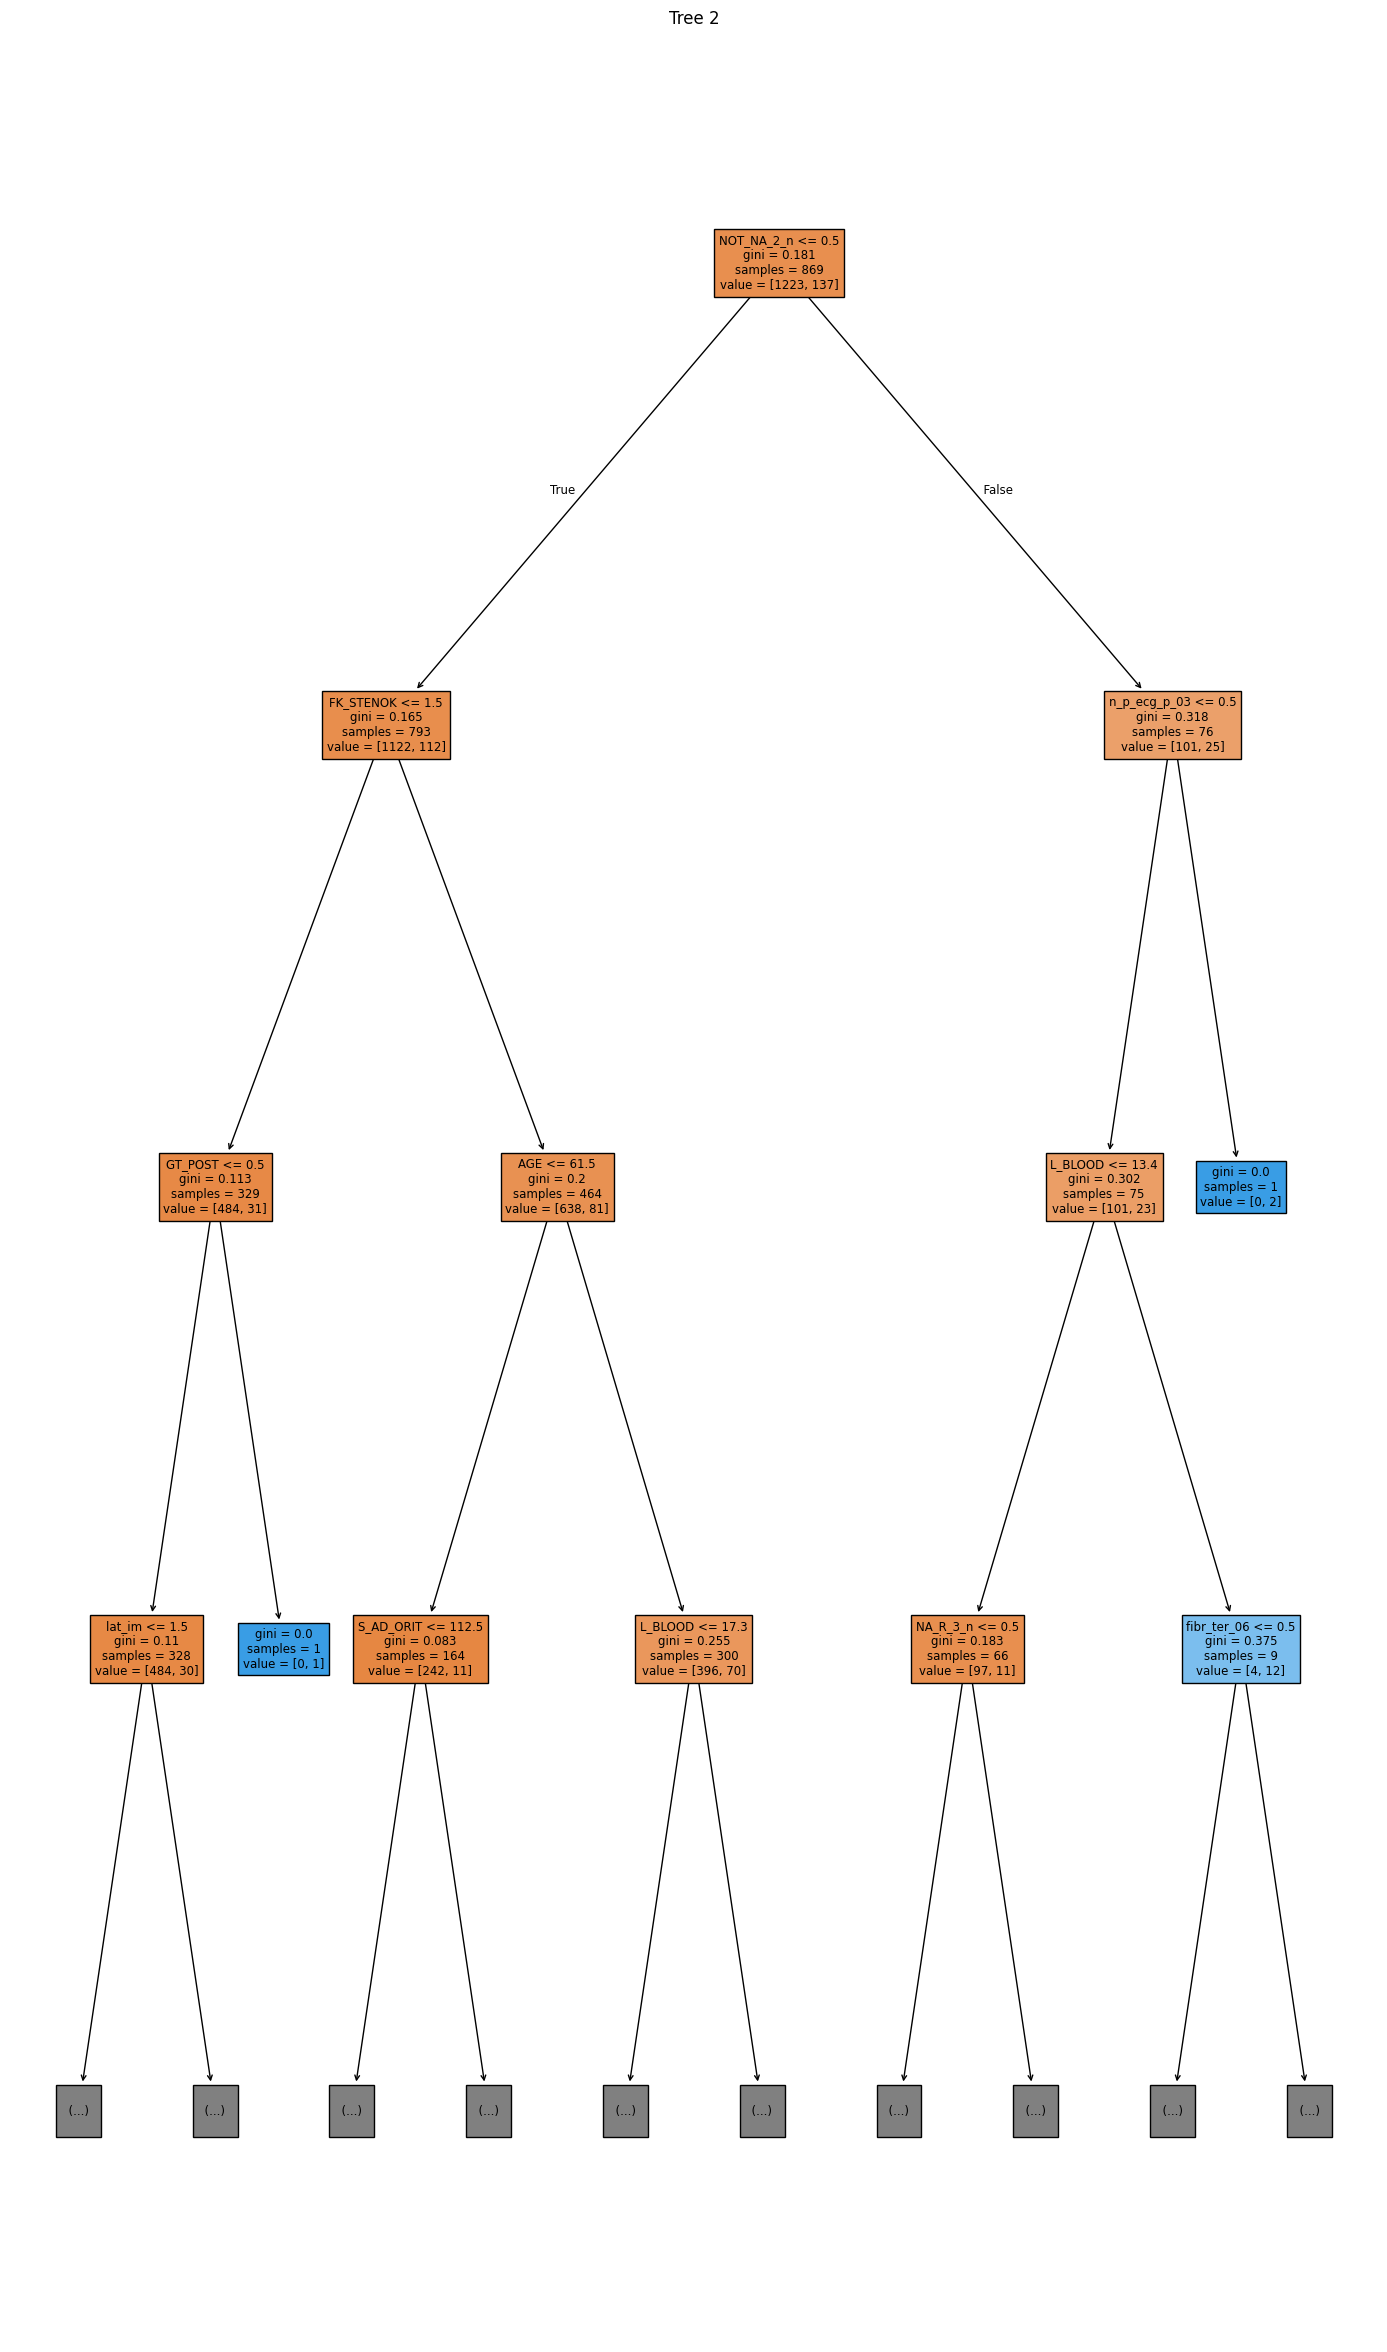

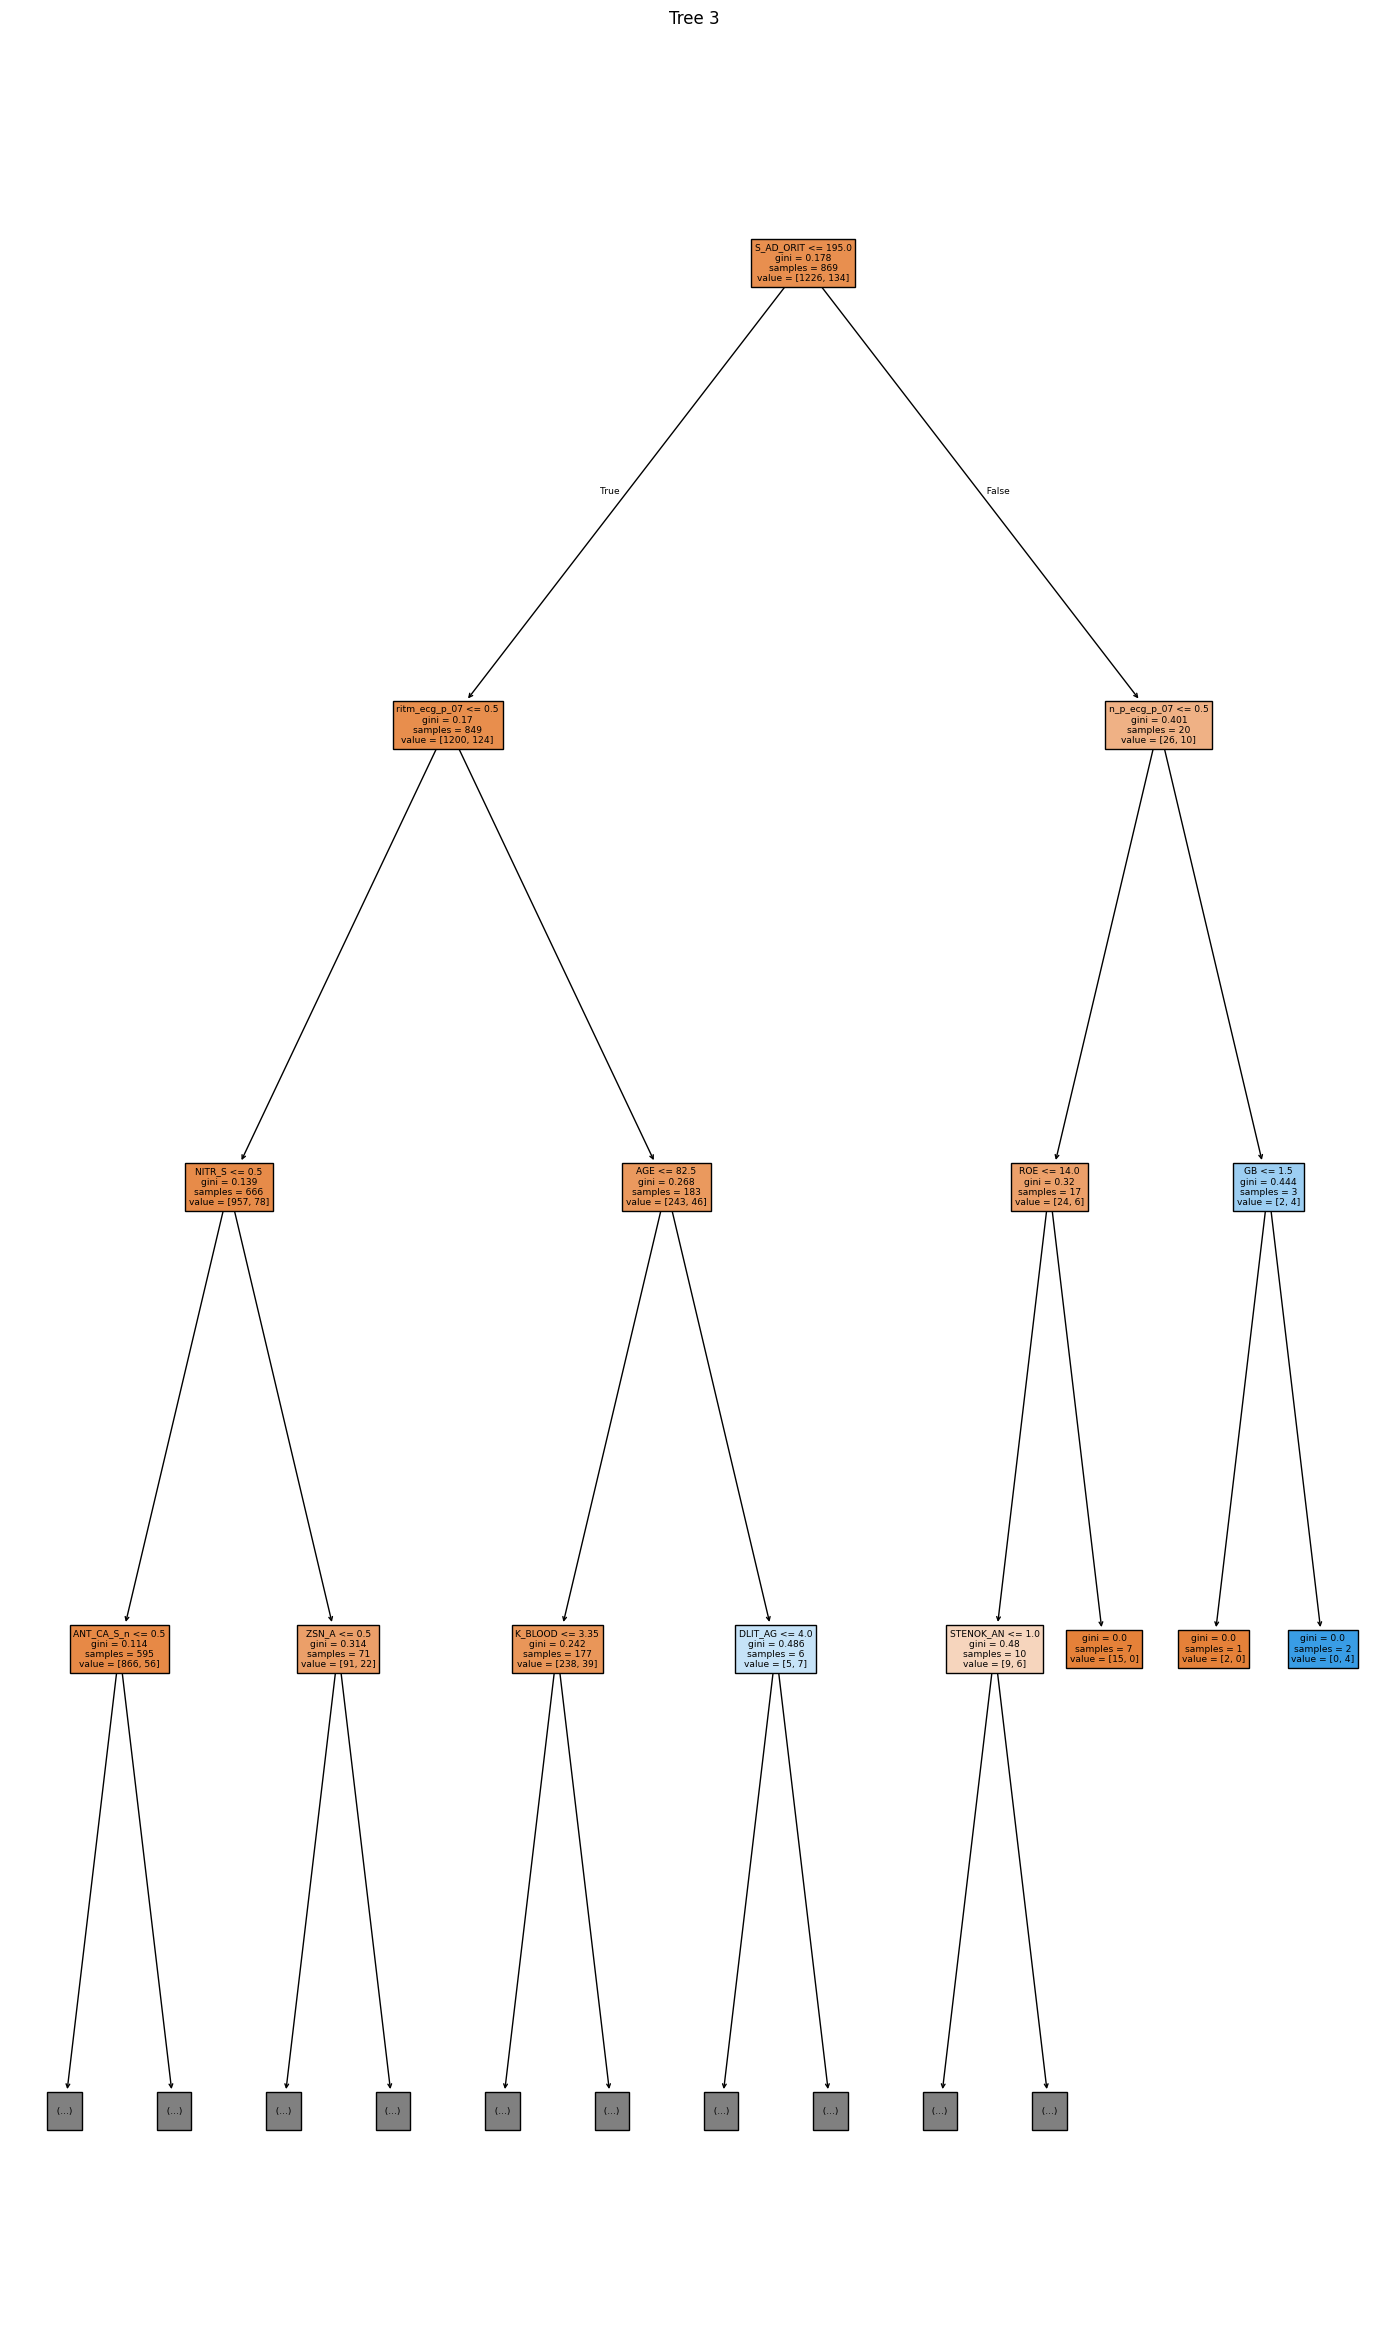

In [261]:
# Оценка работы модели на тестовых данных
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

print(f"Test Accuracy: {accuracy_score(y_test_let_is, y_pred)}")
print("Classification Report:\n", classification_report(y_test_let_is, y_pred, zero_division=0))

# Визуализация структуры трех деревьев из обученной модели
for i in range(3):
    plt.figure(figsize=(60, 30))
    plt.subplot(1, 3, i+1)
    tree_in_forest = best_rf_model.estimators_[i]
    plot_tree(tree_in_forest, feature_names=X.columns, filled=True, max_depth=3)
    plt.title(f"Tree {i+1}")
    plt.show()

Test Accuracy: 0.9176470588235294
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       312
           1       0.00      0.00      0.00        28

    accuracy                           0.92       340
   macro avg       0.46      0.50      0.48       340
weighted avg       0.84      0.92      0.88       340



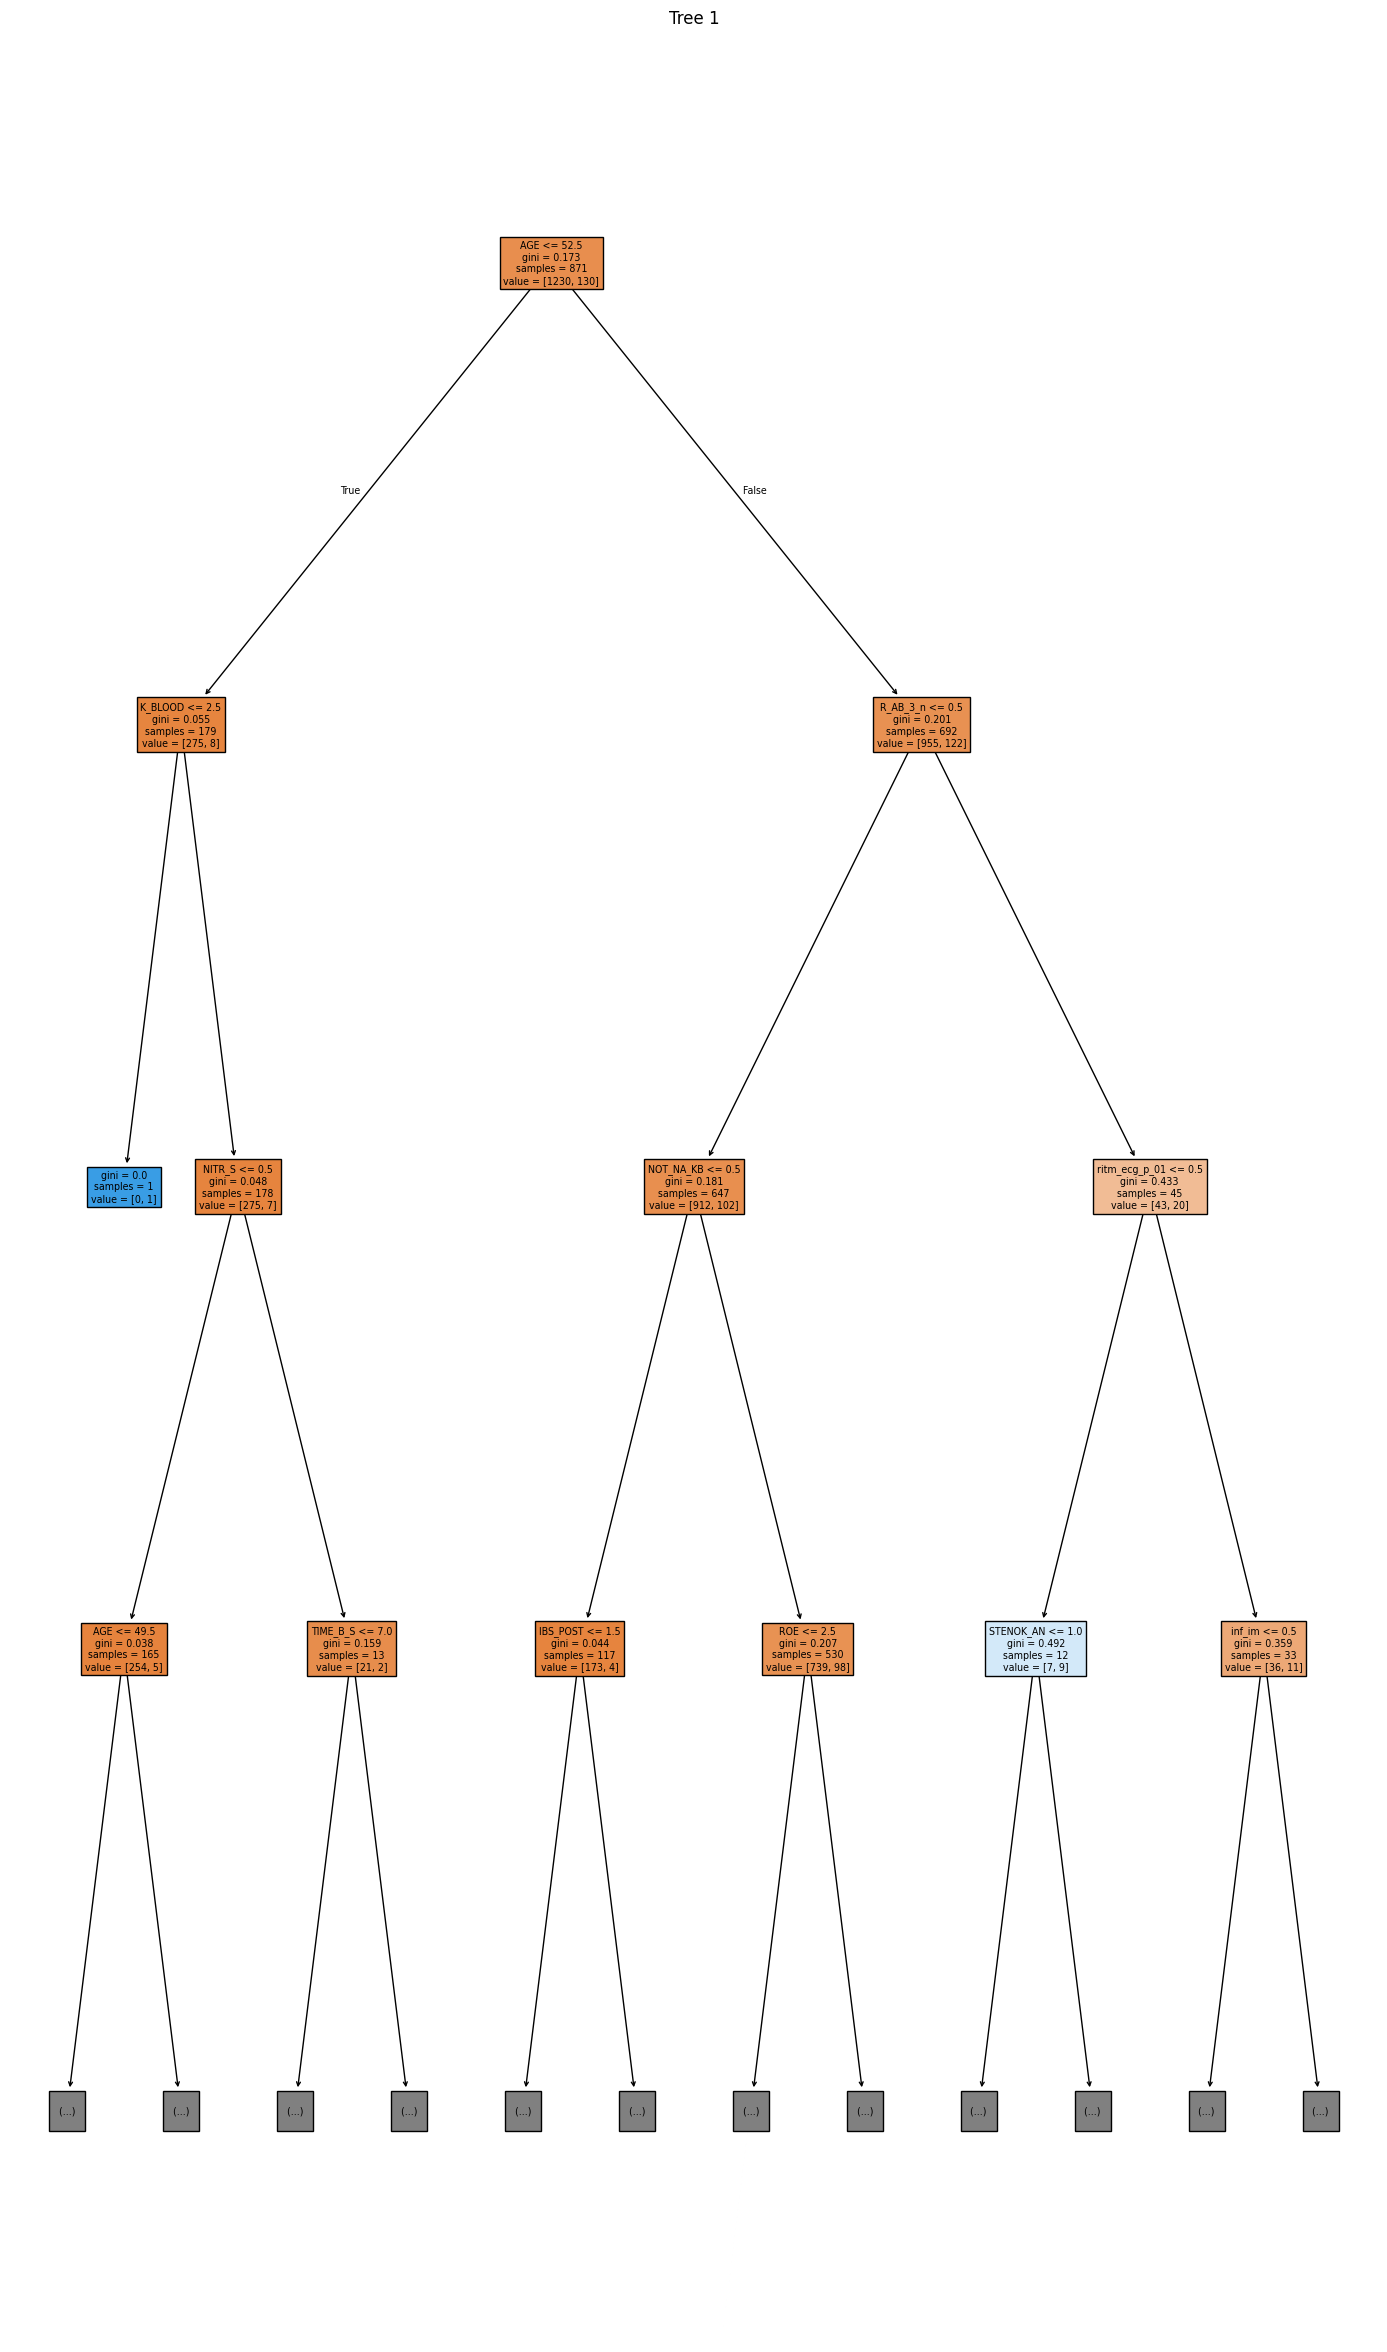

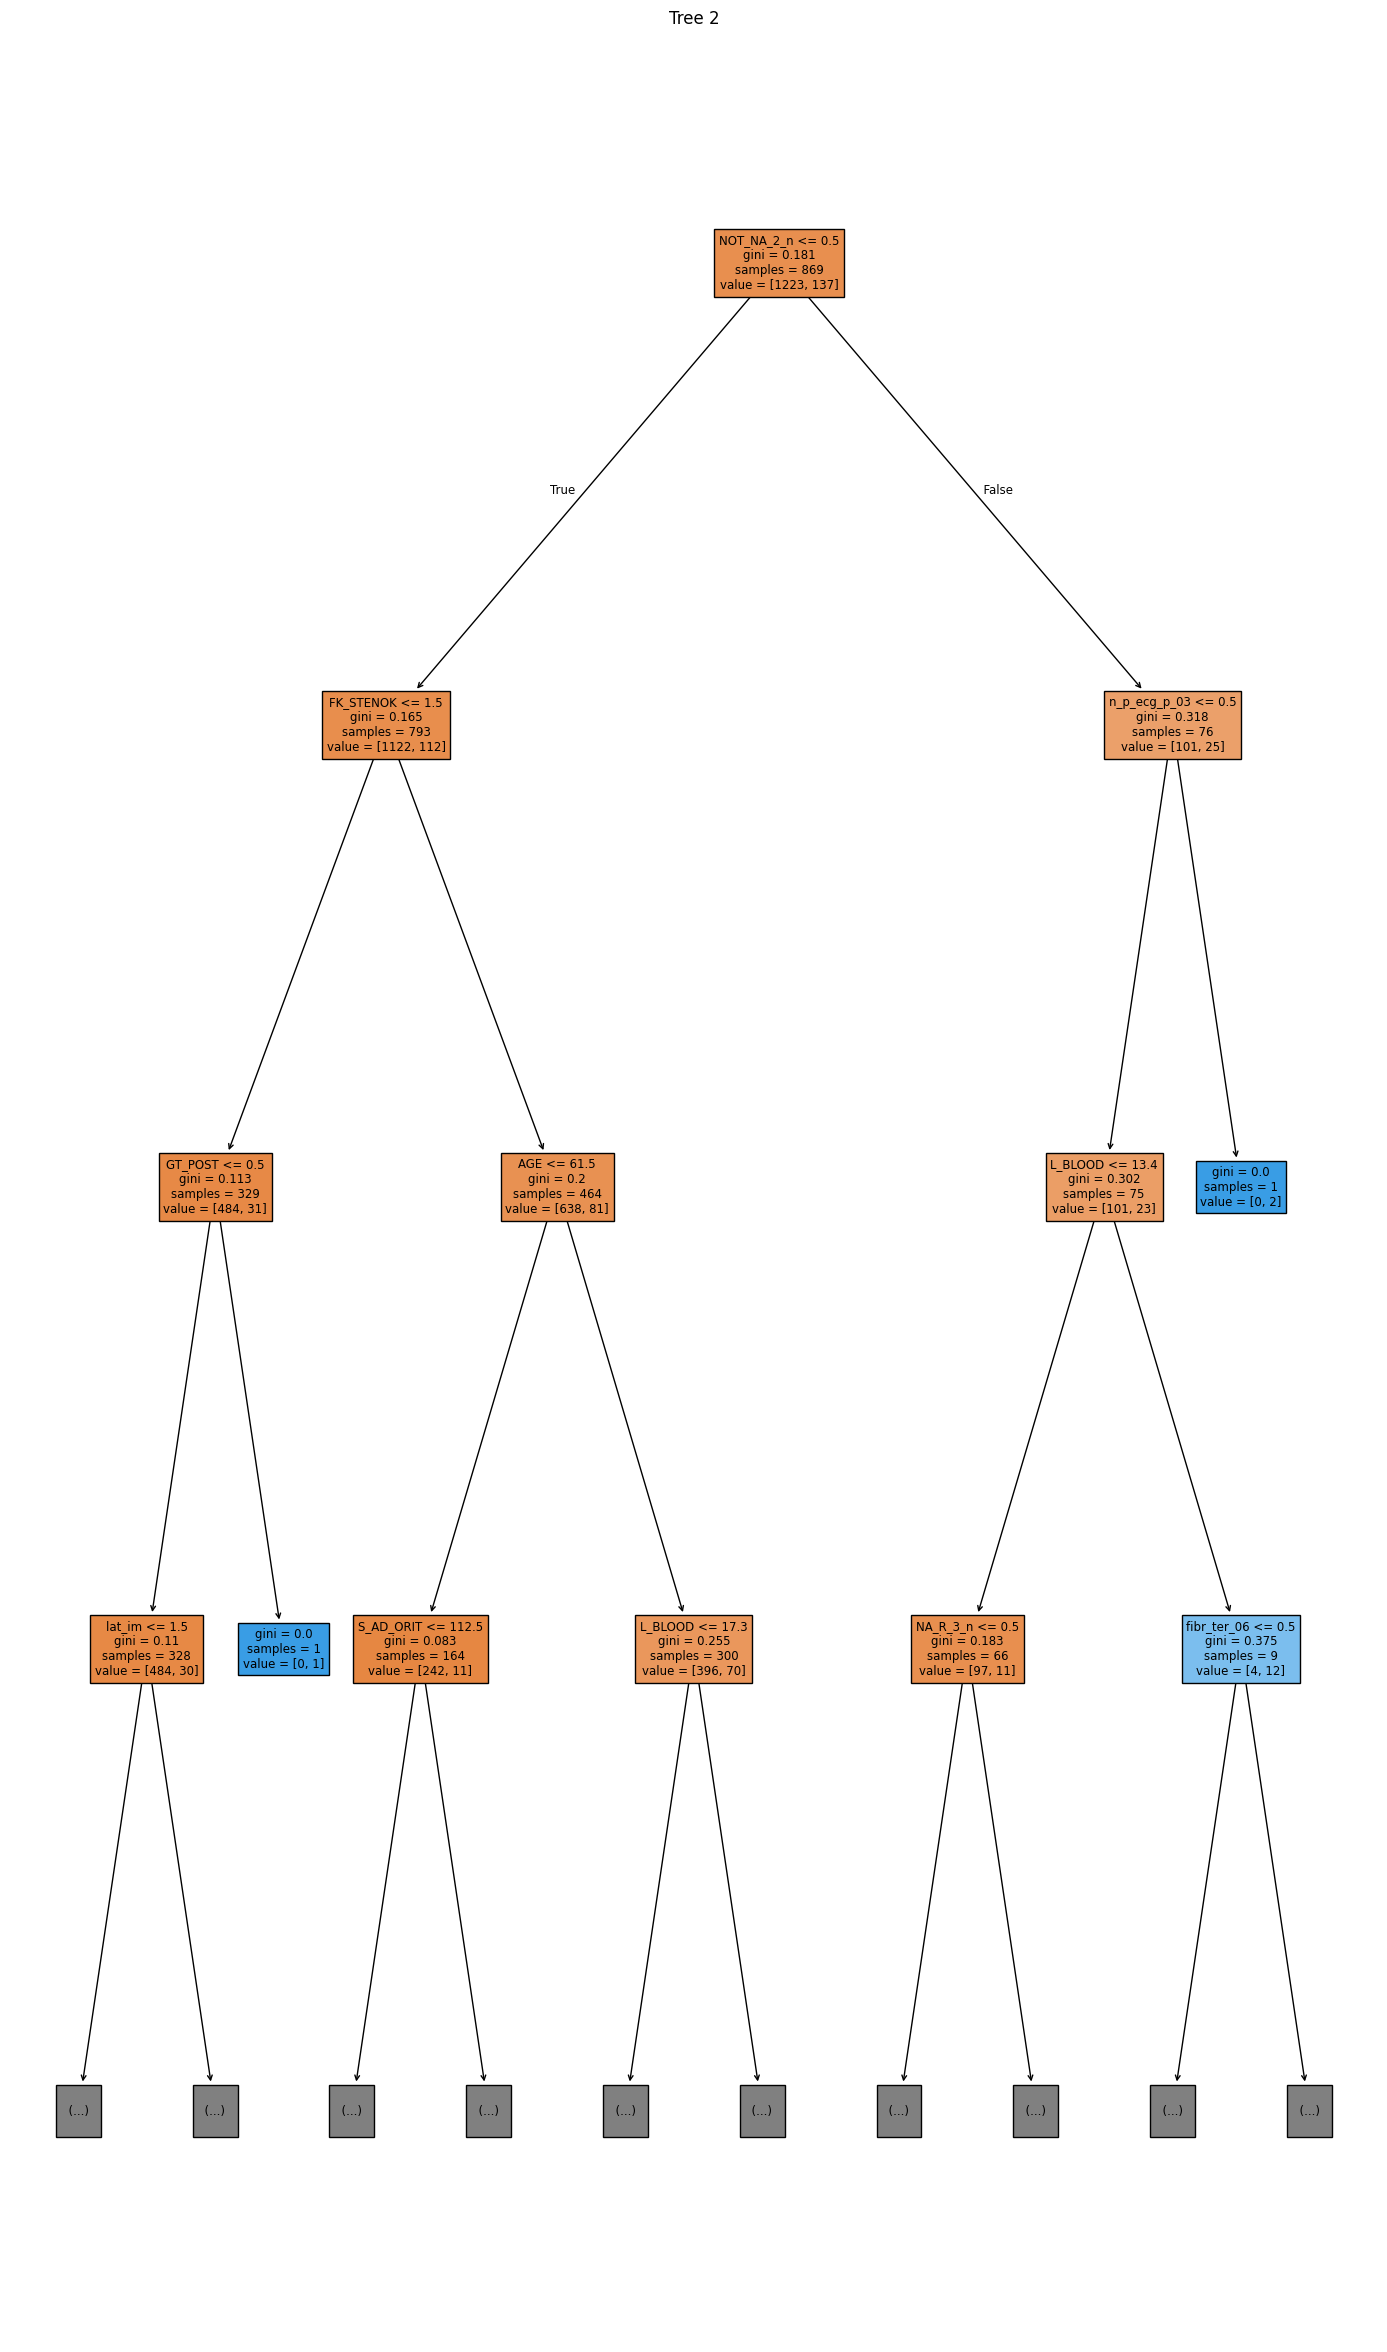

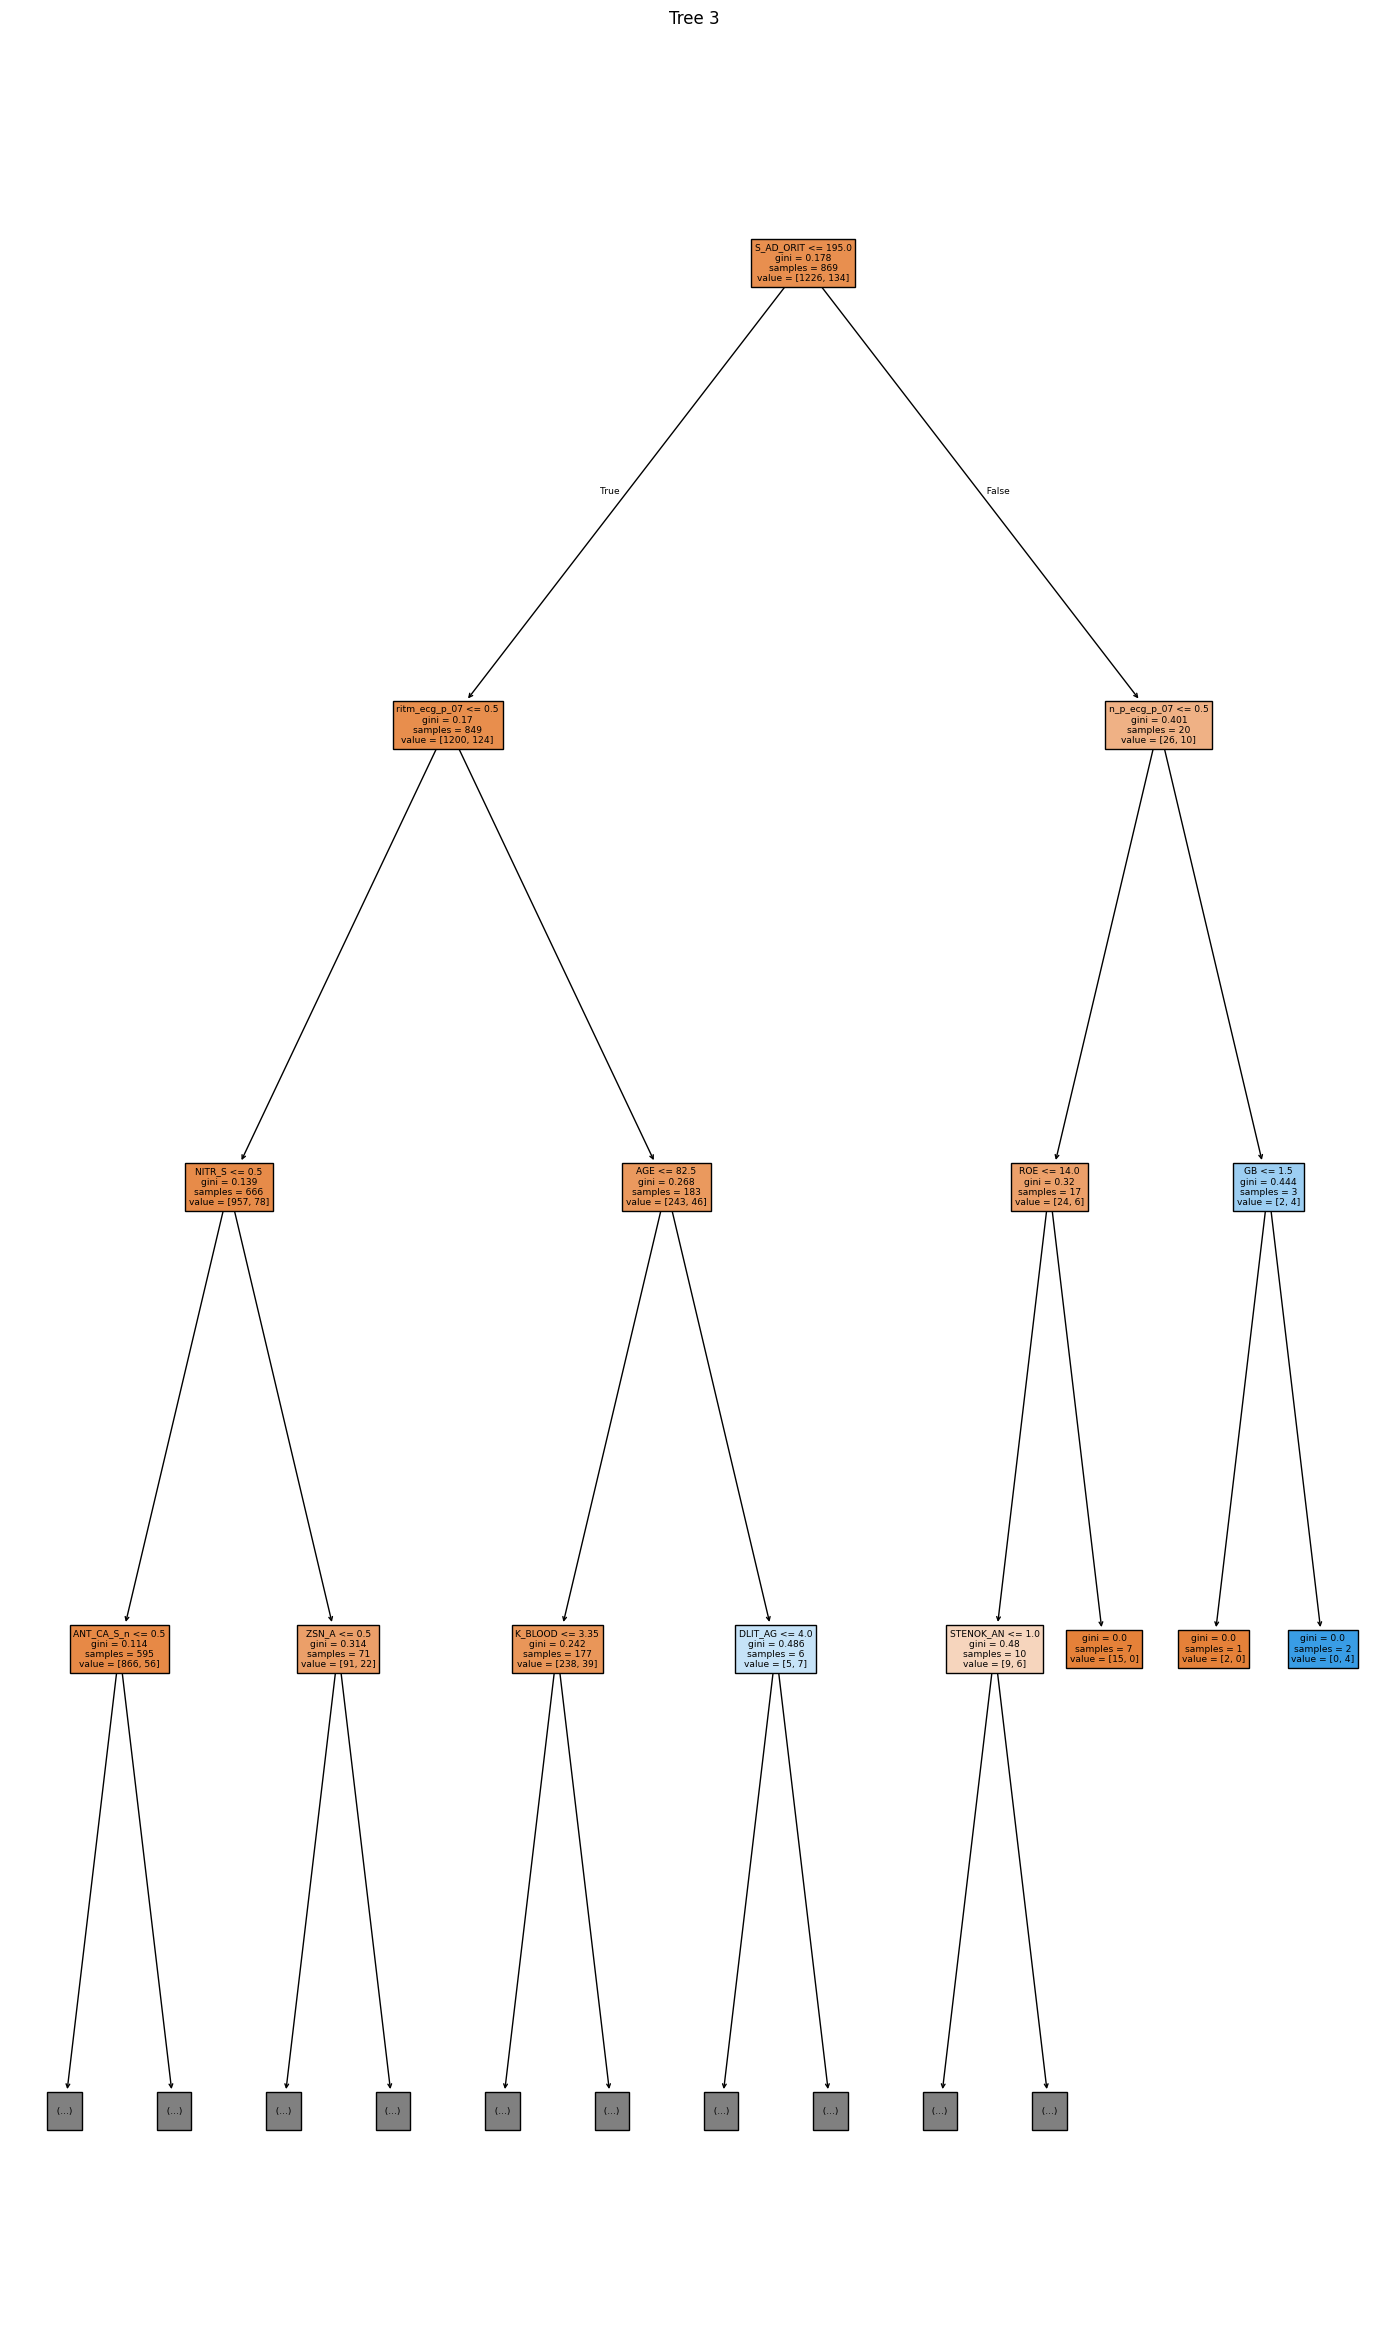

In [262]:
# Оценка работы модели на тестовых данных
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

print(f"Test Accuracy: {accuracy_score(y_test_let_is, y_pred)}")
print("Classification Report:\n", classification_report(y_test_let_is, y_pred, zero_division=0))

# Визуализация структуры трех деревьев из обученной модели
for i in range(3):
    plt.figure(figsize=(60, 30))
    plt.subplot(1, 3, i+1)
    tree_in_forest = best_rf_model.estimators_[i]
    plot_tree(tree_in_forest, feature_names=X.columns, filled=True, max_depth=3)
    plt.title(f"Tree {i+1}")
    plt.show()

## 5. Получить оценки важности показателей с помощью модели RandomForest

In [248]:
import pandas as pd

In [263]:
# Получаем важности признаков
importances = best_rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})

# Сортируем по значимости
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Получаем три наиболее важных признака
top_features = feature_importance_df.head(3)['feature']
print("Три наиболее важных признака:\n", top_features)

Три наиболее важных признака:
 88    L_BLOOD
0         AGE
89        ROE
Name: feature, dtype: object


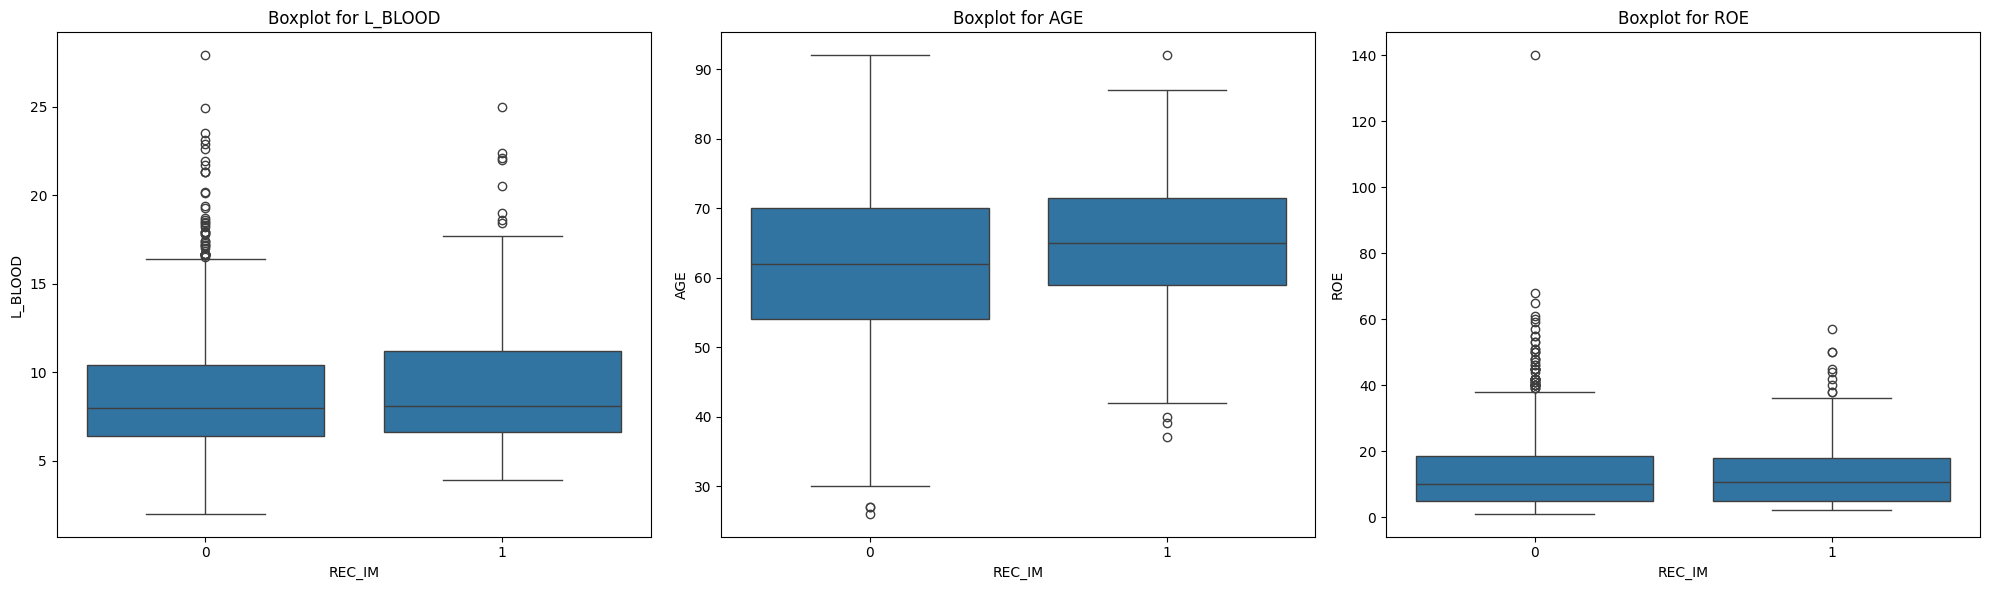

In [266]:
target=y_prep

# Создание боксплотов для трех наиболее важных признаков
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

for i, feature in enumerate(top_features):
    sns.boxplot(x=target, y=X[feature], ax=axs[i])
    axs[i].set_title(f'Boxplot for {feature}')
    axs[i].set_xlabel('REC_IM')
    axs[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

## 6. Построить три модели классификации RandomForest на разном наборе показателей

In [106]:
import numpy as np

### а) Полный набор показателей

In [273]:
rf_full = RandomForestClassifier(random_state=42)
rf_full.fit(X_train, y_train)
y_pred_full = rf_full.predict(X_test)
accuracy_full = accuracy_score(y_test_let_is, y_pred_full)

print("Full feature set accuracy:", accuracy_full)
print("Classification report for full feature set:")
print(classification_report(y_test_let_is, y_pred_full, zero_division=0))

Full feature set accuracy: 0.9176470588235294
Classification report for full feature set:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       312
           1       0.00      0.00      0.00        28

    accuracy                           0.92       340
   macro avg       0.46      0.50      0.48       340
weighted avg       0.84      0.92      0.88       340



- Accuracy: 0.92 — это высокая точность, указывающая на то, что модель в целом хорошо предсказывает метки для данных на тестовой выборке.
  
- Precision для класса 0: 0.92 — означает, что из всех, кого модель предсказала как класс 0, 92% действительно принадлежат этому классу.
  
- Recall для класса 0: 1.00 — означает, что модель подхватывает все экземпляры класса 0, без пропусков.

- Precision для класса 1: 1.00 — высокая точность, но это может быть случайной характеристикой, учитывая низкое присутствие класса.
  
- Recall для класса 1: 0.04 — очень низкое значение, указывающее на то, что модель практически не детектирует класс 1.

- Замечание: Модель хорошо справляется с основной частью данных (класс 0), но плохо распознаёт класс 1.

### б) 30% наиболее важных признаков

In [274]:
importances = rf_full.feature_importances_
indices = np.argsort(importances)[::-1]
num_features_top = int(len(indices) * 0.3)

top_indices = indices[:num_features_top]
X_train_top = X_train.iloc[:, top_indices]
X_test_top = X_test.iloc[:, top_indices]

rf_top = RandomForestClassifier(random_state=42)
rf_top.fit(X_train_top, y_train)
y_pred_top = rf_top.predict(X_test_top)

accuracy_top = accuracy_score(y_test_let_is, y_pred_top)

print("\nTop 30% feature set accuracy:", accuracy_top)
print("Classification report for top 30% feature set:")
print(classification_report(y_test_let_is, y_pred_top, zero_division=0))


Top 30% feature set accuracy: 0.9205882352941176
Classification report for top 30% feature set:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       312
           1       1.00      0.04      0.07        28

    accuracy                           0.92       340
   macro avg       0.96      0.52      0.51       340
weighted avg       0.93      0.92      0.89       340



- Accuracy: 0.92 — практически идентична предыдущему случаю, что свидетельствует о том, что наиболее важные 30% признаков содержат большую часть значимой информации.

- Precision и Recall для класса 1: Оба параметра равны 0, что говорит о полном отсутствии предсказаний для класса 1.

- Заключение: Топ 30% признаков позволяют поддерживать хорошую точность для основного класса (класс 0), но совершенно не справляются с классификацией редкого класса, поэтому важные признаки не улучшают распознавание всех классов.

### в) 30% наименее важных признаков

In [275]:
num_features_bottom = int(len(indices) * 0.3)
bottom_indices = indices[-num_features_bottom:]

X_train_bottom = X_train.iloc[:, bottom_indices]
X_test_bottom = X_test.iloc[:, bottom_indices]

rf_bottom = RandomForestClassifier(random_state=42)
rf_bottom.fit(X_train_bottom, y_train)
y_pred_bottom = rf_bottom.predict(X_test_bottom)

accuracy_bottom = accuracy_score(y_test_let_is, y_pred_bottom)

print("\nBottom 30% feature set accuracy:", accuracy_bottom)
print("Classification report for bottom 30% feature set:")
print(classification_report(y_test_let_is, y_pred_bottom, zero_division=0))


Bottom 30% feature set accuracy: 0.9176470588235294
Classification report for bottom 30% feature set:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       312
           1       0.00      0.00      0.00        28

    accuracy                           0.92       340
   macro avg       0.46      0.50      0.48       340
weighted avg       0.84      0.92      0.88       340



- Accuracy: 0.92 — опять-таки идентично прошлым моделям, свидетельствуя о корректной работе с классом 0, даже при использовании менее значимых признаков.

- Precision и Recall для класса 1: Оба также равны 0, что аналогично предыдущему случаю.

- Заключение: Даже менее важные признаки совместно с классом 0 сохраняют определенную информацию. Но, как и в предыдущем случае, модель не распознает класс 1.

### Общие выводы

1. Несбалансированные данные: Большинство метрик класса 1 нисколько не удовлетворительны. Вероятно, данные сильно несбалансированы, что влияет на способность модели предсказывать менее многочисленный класс.

2. Фокус на одном классе: Будучи преимущественно сосредоточенной на классе 0, модель не уделяет классу 1 достаточного внимания в обучении, что указывает на необходимость применить стратегии балансировки классов, такие как изменение весов классов или применение методов resampling.

3. Необходимость улучшений: Стоит рассмотреть изменение параметров модели, использование других алгоритмов классификации, адаптацию моделей к несбалансированным данным, а также возможно добавление других информативных признаков (если они есть) или методов извлечения признаков.

Модель на полных данных, а также с использованием важных признаков сохранили основную информацию, но все три версии показывают недостаточное внимание к второстепенным классам. Таким образом, необходима дополнительная работа над балансировкой и улучшением представления класса 1.

## 7. Построить модель с бустингом 

In [115]:
from sklearn.ensemble import AdaBoostClassifier

Number of trees: 10, Accuracy: 0.8971
Number of trees: 50, Accuracy: 0.9147
Number of trees: 100, Accuracy: 0.9118
Number of trees: 200, Accuracy: 0.9147
Number of trees: 300, Accuracy: 0.9235
Number of trees: 500, Accuracy: 0.9206
Number of trees: 800, Accuracy: 0.9176


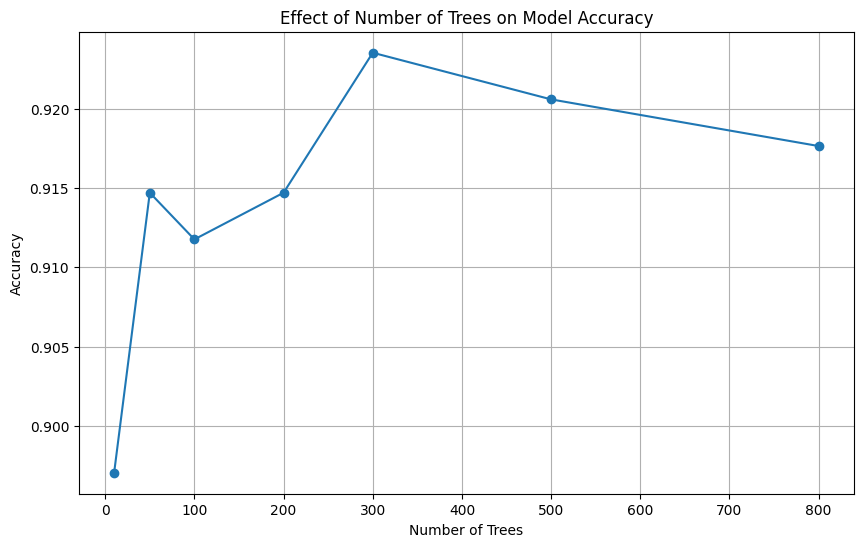

In [124]:
# Параметры для экспериментов
n_estimators_range = [10, 50, 100, 200, 300, 500, 800]
accuracy_scores = []

# Построение и оценка модели для разных количеств деревьев
for n_estimators in n_estimators_range:
    # Ограничиваем глубину дерева тремя уровнями
    base_estimator = DecisionTreeClassifier(max_depth=3, random_state=42)
    
    # Создаем и обучаем модель AdaBoost
    model = AdaBoostClassifier(estimator=base_estimator, n_estimators=n_estimators, algorithm='SAMME', random_state=42)
    model.fit(X_train, y_train)
    
    # Прогноз и оценка точности
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test_let_is, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Number of trees: {n_estimators}, Accuracy: {accuracy:.4f}")

# Визуализация влияния числа деревьев на точность
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracy_scores, marker='o')
plt.title("Effect of Number of Trees on Model Accuracy")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

- С увеличением числа деревьев от 10 до 300, точность модели также увеличивается с 0.8971 до 0.9235. Это ожидаемый результат: большее количество деревьев обычно приводит к более стабильным и обобщающим результатам, поскольку модель лучше улавливает сложные зависимости в данных.
- При дальнейшем увеличении числа деревьев до 500 и 800 точность начинает немного падать или стабилизируется (0.9206 и 0.9176 соответственно). Это может указывать на то, что увеличение числа деревьев после определенного порога не приносит существенного улучшения в точности.
- Колебания в точности небольшой величины могут быть связаны с случайностью выбора обучающего набора или внутренней вариативностью в данных. Малые изменения указывают на стабильность модели при разных размерах ансамбля.

### Выводы:

1. В данном случае число деревьев около 300 должно быть оптимальным, так как оно показывает наивысшую точность. Количество деревьев в этом числе может быть предпочтительным выбором для оптимального баланса между производительностью модели и вычислительными затратами.
  
2. После 300 деревьев добавление дополнительных деревьев дает незначительное улучшение или может даже ухудшить точность.

3. Модели с меньшим числом деревьев (например, 10) могут быть менее устойчивыми и иметь меньшую точность. Однако они вычислительно более эффективны, что может быть полезно в ограниченных по ресурсам сценариях.